In [2]:
import pandas as pd
import numpy as np
import datetime
import os
from IPython.display import display

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from MyTransformers import *
from sklearn.model_selection import train_test_split

#%config Completer.use_jedi = False
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

In [2]:
f_data_path = "PrepedData/"
f_data_LPG = "Data/LPG/"
temperatureFileName = "Temperature.csv"
electricityFileName = "SumProfiles.Electricity.csv"
prof2 = "CHR03 in HT02/"
prof3 = "H01 in HT02/"
prof4 = "SHO01 CHS01 in HT06/"
prof5 = "CHR03 Family, 1 child, both at work/"
file = f_data_LPG + prof5

In [16]:
df = pd.read_csv(file + electricityFileName,sep=';', parse_dates=['Time'])
# df.rename(columns = {"Time": "date"}, inplace = True)

In [17]:
temp = pd.read_csv(file + temperatureFileName,sep=';', parse_dates=['DateTime'])

In [18]:
all = temp.merge(df, left_on = 'Timestep',right_on = 'Electricity.Timestep',how = 'left')
all = all[['Time', 'Sum [kWh]', 'Temperature']]
all.rename(columns = {"Time": "date", 'Sum [kWh]':"energy", 'Temperature': 'temp'}, inplace = True)

In [19]:
import winsound
winsound.Beep(1000, 300)

In [17]:
df = df[['Time', 'Sum [kWh]']]
df.rename(columns = {"Time": "date", 'Sum [kWh]':"energy"}, inplace = True)

In [20]:
all.to_feather(f_data_path + "LPG-Profile-4.feather")

In [3]:
data = pd.read_feather(f_data_path + "LPG-Profile-4.feather")

In [4]:
f_data_path = "PrepedData/"
orginal = pd.read_feather(f_data_path + "LPG-Profile-4.feather")['energy'].values
orginal = np.sum(orginal.reshape(-1,120),axis=1)


In [ ]:
data,lam = stats.boxcox(orginal)

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

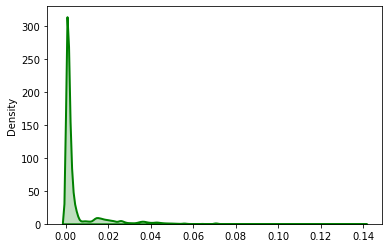

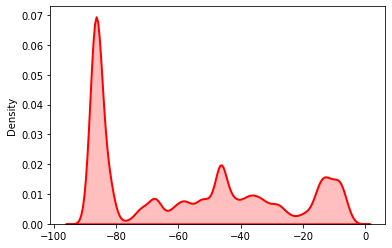

In [9]:
from matplotlib import pyplot as plt
sns.distplot(orginal, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green")
plt.figure()
sns.distplot(data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red")

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

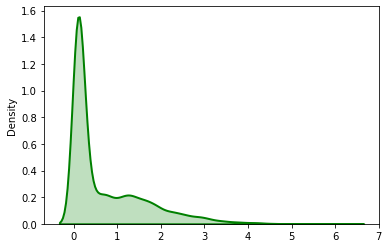

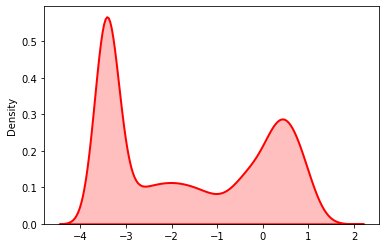

In [11]:
from matplotlib import pyplot as plt
sns.distplot(orginal, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green")
plt.figure()
sns.distplot(data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red")

In [16]:
from scipy.special import inv_boxcox
trans = inv_boxcox(data[:50],lam)

In [14]:
trans = (data[:50]**lam - 1) / lam

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


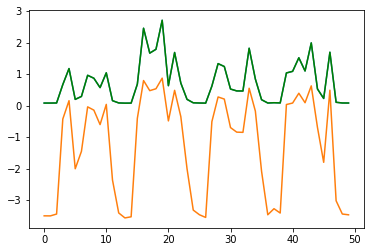

In [17]:
plt.plot(orginal[:50])
plt.plot(data[:50])
plt.plot(trans,'g')

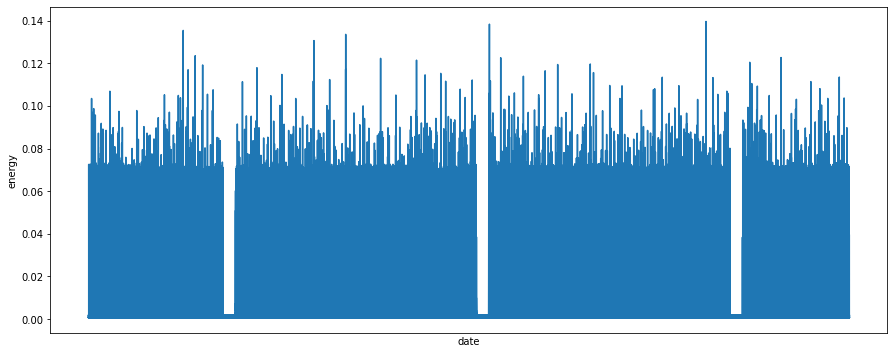

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

fig=plt.figure(figsize=(15,6))
sns.lineplot(orginal)
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [8]:
result=adfuller (orginal)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -13.927282
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [9]:
result_kpss_ct=kpss(orginal,regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.074478
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


[  6   9 157 313] {'peak_heights': array([1.00714021, 1.08245466, 1.49793637, 1.45173074])}


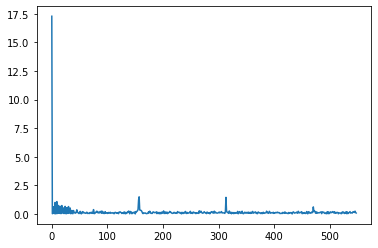

In [52]:
from scipy.signal import find_peaks
x = np.sum(orginal.reshape(-1,120*12),axis=1)
y = np.fft.fft(x)
y = 2.0 / len(x) * np.abs(y[:len(x)//2])

plt.plot(np.abs(y))
index, prop = find_peaks(y,height=1)
print(index,prop)

In [173]:
b = np.array([2,6,3,8,5,0])

prev = []
n = 4
a = b
for i in range(n):
    prev.append(a[0])
    a = np.diff(a)

print(a)

for i in range(n):
    a = np.cumsum(np.concatenate([[prev[-i -1]],a]))

print(a)


[-31  22]
[2 6 3 8 5 0]


In [13]:
b = np.array([2,6,3,8,5,0])
prev = []
a = b
lags = [1,2]
#diff
prev = []
for lag in lags:
    prev.append(a[:lag])
    a = a[lag:]- a[:-lag]
    print(a)

print("reverese", prev)

for k,lag in reversed(list(enumerate(lags))):
    cc = np.empty(len(a)+lag)
    for i in range(lag):
        print(k, i)
        print(prev[k][i])
        cc[i::lag] = np.cumsum(np.concatenate([[prev[k][i]],a[i::lag]]))
    print(cc)
    a = cc

[ 4 -3  5 -3 -5]
[  1   0 -10]
reverese [array([2]), array([ 4, -3])]
1 0
4
1 1
-3
[ 4. -3.  5. -3. -5.]
0 0
2
[2. 6. 3. 8. 5. 0.]


In [84]:
a = np.arange(100)
batch = 20
lag = 3
print(a[:len(a) - len(a)%batch].reshape(-1,batch)[:,:lag])
a = a[lag:] - a[:-lag]
print(a[:len(a) - len(a)%batch].reshape(-1,batch)[:,:lag])

[[ 0  1  2]
 [20 21 22]
 [40 41 42]
 [60 61 62]
 [80 81 82]]
[[3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]]


In [216]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [194]:
xdiff = np.sum(orginal.reshape(-1,180),axis=1)
xdiff = xdiff[1:] - xdiff[:-1]
xdiff = xdiff[4:] - xdiff[:-4]
xdiff = xdiff[56:] - xdiff[:-56]


#xdiff = np.diff(xdiff,4)

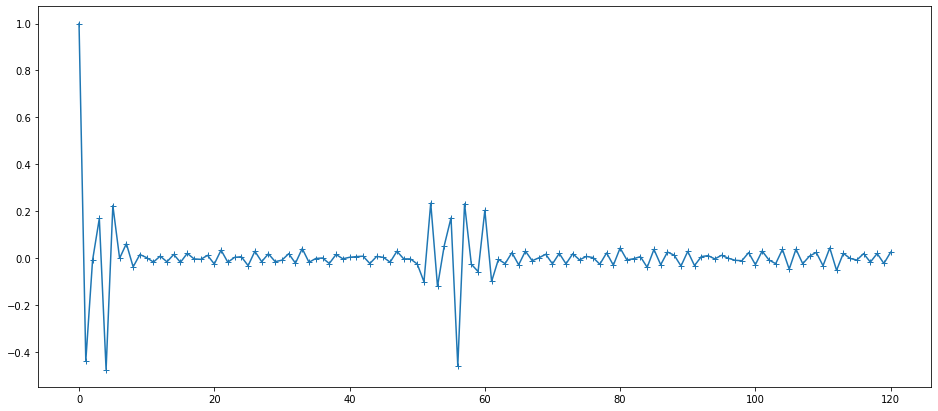

In [196]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(xdiff, nlags=120)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')

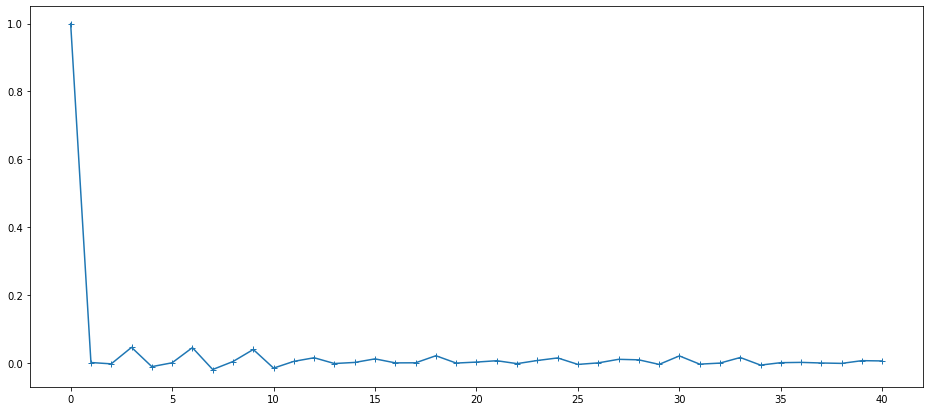

In [58]:
lag_pacf = pacf(y, nlags=40, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')

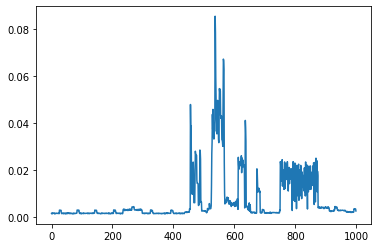

In [19]:
from matplotlib import pyplot as plt

In [ ]:
def reduce_mem_usage(df: pd.DataFrame,
                     verbose: bool = True) -> pd.DataFrame:
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':

                if (c_min > np.iinfo(np.int32).min
                      and c_max < np.iinfo(np.int32).max):
                    df[col] = df[col].astype(np.int32)
                elif (c_min > np.iinfo(np.int64).min
                      and c_max < np.iinfo(np.int64).max):
                    df[col] = df[col].astype(np.int64)
            else:
                if (c_min > np.finfo(np.float16).min
                        and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min
                      and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    reduction = (start_mem - end_mem) / start_mem

    msg = f'Mem. usage decreased to {end_mem:5.2f} MB ({reduction * 100:.1f} % reduction)'
    if verbose:
        print(msg)

    return df